In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
#client = scaleout.make_dask_client("tls://localhost:8786")
#client

In [3]:
samples = [
    '2Mu2E_500GeV_5p0GeV_8p0mm',
    'TTJets',
]

In [4]:
for sample in samples:
    print(sample, utilities.get_xs(sample))

Signal not in xs cfg, assuming 1fb
2Mu2E_500GeV_5p0GeV_8p0mm 0.001
TTJets 471.7


In [5]:
fileset = utilities.make_fileset([samples[0]], "llpNanoAOD_v2", max_files=10, location_cfg="signal_2mu2e_v10.yaml")
fileset = utilities.make_fileset([samples[1]], "llpNanoAOD_v2", max_files=10, location_cfg="backgrounds.yaml", fileset=fileset)
skimmed_fileset = utilities.make_fileset([samples[1]], "skimmed_llpNanoAOD_v2", max_files=10, location_cfg="backgrounds.yaml")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    #executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
)

channels = [
    "2mu2e",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["muon_base"],
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]
skimmed_output = runner.run(skimmed_fileset, treename='Events', processor_instance=p)
skimmed_out = skimmed_output["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [6]:
for sample in samples:
    print(sample, out[sample]["metadata"])
print(sample, skimmed_out[samples[1]]["metadata"])

2Mu2E_500GeV_5p0GeV_8p0mm {'n_evts': 43879}
TTJets {'n_evts': 402863}
TTJets {'n_evts': 108915}


In [7]:
print(samples[0])
out[samples[0]]["cutflow"][channels[0]].print_table()
print()
out[samples[0]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[0]]["cutflow"][channels[0]].print_table(fraction=True)
print()

2Mu2E_500GeV_5p0GeV_8p0mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                22.3         22.3
PV filter                    59.8         22.3
>=2 LJs                      11.8          5.0
2mu2e                        11.7          5.0

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection              43879.0      43879.0
pass triggers             16375.0      16375.0
PV filter                 43879.0      16375.0
>=2 LJs                    8644.0       3681.0
2mu2e                      8603.0       3668.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers            37.3          37.3            37.3
PV filter               100.0         100.0            37.3
>=2 LJs       

In [8]:
print(samples[1])
out[samples[1]]["cutflow"][channels[0]].print_table()
print()
out[samples[1]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[1]]["cutflow"][channels[0]].print_table(fraction=True)
print()

TTJets
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection           28221811.0   28221811.0
pass triggers            483856.9     483856.9
PV filter              28221811.0     483856.9
>=2 LJs                  154186.9       2802.1
2mu2e                     13310.1       2451.9

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             402863.0     402863.0
pass triggers              6907.0       6907.0
PV filter                402863.0       6907.0
>=2 LJs                    2201.0         40.0
2mu2e                       190.0         35.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers             1.7           1.7             1.7
PV filter               100.0         100.0             1.7
>=2 LJs                   0.5    

In [9]:
print(samples[1], "SKIM")
skimmed_out[samples[1]]["cutflow"][channels[0]].print_table()
print()
skimmed_out[samples[1]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
skimmed_out[samples[1]]["cutflow"][channels[0]].print_table(fraction=True)
print()

TTJets SKIM
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection            7692583.9    7692583.9
pass triggers            491508.9     491508.9
PV filter               7692583.9     491508.9
>=2 LJs                  149592.7       2825.2
2mu2e                     12713.3       2542.7

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             108915.0     108915.0
pass triggers              6959.0       6959.0
PV filter                108915.0       6959.0
>=2 LJs                    2118.0         40.0
2mu2e                       180.0         36.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers             6.4           6.4             6.4
PV filter               100.0         100.0             6.4
>=2 LJs                   1.

In [10]:
output.keys()

dict_keys(['out', 'processed', 'exception'])

In [11]:
print(output["processed"])
print(skimmed_output["processed"])

{WorkItem(dataset='TTJets', filename='root://xcache//store/group/lpcmetx/SIDM/Backgrounds/2018_v2/TTJets_TuneCP5/LLPnanoAODv2/TTJets_TuneCP5_part1_part-0.root', treename='Events', entrystart=0, entrystop=46211, fileuuid=b'j\x19\x1eT(\xeb\x11\xef\xb8\xe7`\x15\xe6\x9b\xbe\xef', usermeta={'skim_factor': 1.0}), WorkItem(dataset='TTJets', filename='root://xcache//store/group/lpcmetx/SIDM/Backgrounds/2018_v2/TTJets_TuneCP5/LLPnanoAODv2/TTJets_TuneCP5_part1_part-15.root', treename='Events', entrystart=0, entrystop=40520, fileuuid=b':"*\xa4(\xed\x11\xef\xb9)l\x15\xe6\x9b\xbe\xef', usermeta={'skim_factor': 1.0}), WorkItem(dataset='2Mu2E_500GeV_5p0GeV_8p0mm', filename='root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_v3_part-15.root', treename='Events', entrystart=0, entrystop=4400, fileuuid=b'\xf2\xcf@\x10\xbf\x87\x11\xef\xb7\xacV\x

In [12]:
out[samples[0]]["hists"]

{'muon_n': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(10, 0, 10, name='muons_n', label='Number of PF Muons'),
   storage=Weight()) # Sum: WeightedSum(value=5.0014, variance=0.00681952),
 'muon_pt': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 500, name='muons_pt', label='PF Muon $p_T$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=9.77646, variance=0.0133304),
 'muon_dxy': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 100, name='muons_dxy', label='PF Muon $d_0$'),
   storage=Weight()) # Sum: WeightedSum(value=4.89232, variance=0.00667079) (WeightedSum(value=9.77646, variance=0.0133304) with flow),
 'muon_eta_phi': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(50, -3, 3, name='muons_eta', label='PF Muon $\\eta$'),
   Regular(50, -3.14159, 3.14159, name='muons_phi', label='PF Muon $\\phi$'),
   storage=Weight()) # Sum: WeightedSum(value=9.77509, variance=0.0133286) (WeightedSum(value=9.77646, variance=0.0

In [13]:
out[samples[1]]["hists"]

{'muon_n': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(10, 0, 10, name='muons_n', label='Number of PF Muons'),
   storage=Weight()) # Sum: WeightedSum(value=2451.86, variance=171760),
 'muon_pt': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 500, name='muons_pt', label='PF Muon $p_T$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=6725.1, variance=471114),
 'muon_dxy': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 100, name='muons_dxy', label='PF Muon $d_0$'),
   storage=Weight()) # Sum: WeightedSum(value=3642.76, variance=255187) (WeightedSum(value=6725.1, variance=471114) with flow),
 'muon_eta_phi': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(50, -3, 3, name='muons_eta', label='PF Muon $\\eta$'),
   Regular(50, -3.14159, 3.14159, name='muons_phi', label='PF Muon $\\phi$'),
   storage=Weight()) # Sum: WeightedSum(value=6725.1, variance=471114),
 'muon_absD0': Hist(
   StrCategory(['2mu2e'], name='chann

In [14]:
skimmed_out[samples[1]]["hists"]

{'muon_n': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(10, 0, 10, name='muons_n', label='Number of PF Muons'),
   storage=Weight()) # Sum: WeightedSum(value=2542.65, variance=179586),
 'muon_pt': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 500, name='muons_pt', label='PF Muon $p_T$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=6709.78, variance=473906),
 'muon_dxy': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 100, name='muons_dxy', label='PF Muon $d_0$'),
   storage=Weight()) # Sum: WeightedSum(value=3248.94, variance=229470) (WeightedSum(value=6709.78, variance=473906) with flow),
 'muon_eta_phi': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(50, -3, 3, name='muons_eta', label='PF Muon $\\eta$'),
   Regular(50, -3.14159, 3.14159, name='muons_phi', label='PF Muon $\\phi$'),
   storage=Weight()) # Sum: WeightedSum(value=6709.78, variance=473906),
 'muon_absD0': Hist(
   StrCategory(['2mu2e'], name='ch

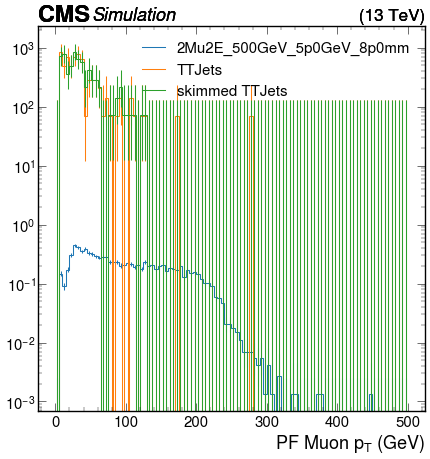

In [15]:
legend = [*samples, f"skimmed {samples[1]}"]
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_pt"][channels[0], :])
utilities.plot(skimmed_out[samples[1]]["hists"]["muon_pt"][channels[0], :])
plt.yscale("log")
plt.legend(legend)

In [16]:
p_unweighted = sidm_processor.SidmProcessor(
    channels,
    ["muon_base"],
    unweighted_hist=True,
)

output_unweighted = runner.run(fileset, treename='Events', processor_instance=p_unweighted)
out_unweighted = output_unweighted["out"]
skimmed_output_unweighted = runner.run(fileset, treename='Events', processor_instance=p_unweighted)
skimmed_out_unweighted = skimmed_output_unweighted["out"]

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb


Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb


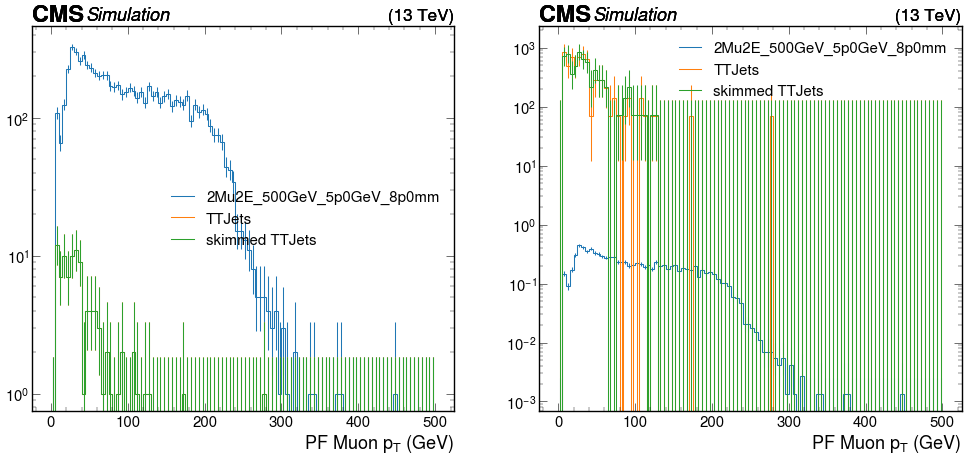

In [17]:
plt.subplots(1, 2, figsize=(2*12, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out_unweighted[sample]["hists"]["muon_pt"][channels[0], :])
utilities.plot(skimmed_out_unweighted[samples[1]]["hists"]["muon_pt"][channels[0], :])
plt.yscale("log")
plt.legend(legend)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_pt"][channels[0], :])
utilities.plot(skimmed_out[samples[1]]["hists"]["muon_pt"][channels[0], :])
plt.yscale("log")
plt.legend(legend)

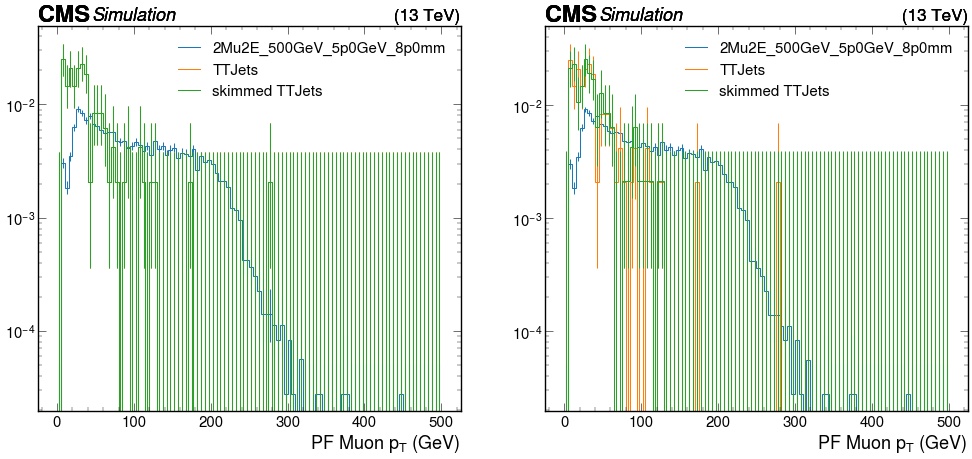

In [18]:
plt.subplots(1, 2, figsize=(2*12, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out_unweighted[sample]["hists"]["muon_pt"][channels[0], :], density=True)
utilities.plot(skimmed_out_unweighted[sample]["hists"]["muon_pt"][channels[0], :], density=True)
plt.yscale("log")
plt.legend(legend)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["muon_pt"][channels[0], :], density=True)
utilities.plot(skimmed_out[sample]["hists"]["muon_pt"][channels[0], :], density=True)
plt.yscale("log")
plt.legend(legend)

In [19]:
out_unweighted[samples[0]]["hists"]

{'muon_n': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(10, 0, 10, name='muons_n', label='Number of PF Muons'),
   storage=Weight()) # Sum: WeightedSum(value=3668, variance=3668),
 'muon_pt': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 500, name='muons_pt', label='PF Muon $p_T$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=7170, variance=7170),
 'muon_dxy': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 100, name='muons_dxy', label='PF Muon $d_0$'),
   storage=Weight()) # Sum: WeightedSum(value=3588, variance=3588) (WeightedSum(value=7170, variance=7170) with flow),
 'muon_eta_phi': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(50, -3, 3, name='muons_eta', label='PF Muon $\\eta$'),
   Regular(50, -3.14159, 3.14159, name='muons_phi', label='PF Muon $\\phi$'),
   storage=Weight()) # Sum: WeightedSum(value=7169, variance=7169) (WeightedSum(value=7170, variance=7170) with flow),
 'muon_absD0': Hist(
   StrCa

In [20]:
out_unweighted[samples[1]]["hists"]

{'muon_n': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(10, 0, 10, name='muons_n', label='Number of PF Muons'),
   storage=Weight()) # Sum: WeightedSum(value=35, variance=35),
 'muon_pt': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 500, name='muons_pt', label='PF Muon $p_T$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=96, variance=96),
 'muon_dxy': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 100, name='muons_dxy', label='PF Muon $d_0$'),
   storage=Weight()) # Sum: WeightedSum(value=52, variance=52) (WeightedSum(value=96, variance=96) with flow),
 'muon_eta_phi': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(50, -3, 3, name='muons_eta', label='PF Muon $\\eta$'),
   Regular(50, -3.14159, 3.14159, name='muons_phi', label='PF Muon $\\phi$'),
   storage=Weight()) # Sum: WeightedSum(value=96, variance=96),
 'muon_absD0': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 500, name='muons_

In [21]:
skimmed_out_unweighted[samples[1]]["hists"]

{'muon_n': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(10, 0, 10, name='muons_n', label='Number of PF Muons'),
   storage=Weight()) # Sum: WeightedSum(value=35, variance=35),
 'muon_pt': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 500, name='muons_pt', label='PF Muon $p_T$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=96, variance=96),
 'muon_dxy': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 100, name='muons_dxy', label='PF Muon $d_0$'),
   storage=Weight()) # Sum: WeightedSum(value=52, variance=52) (WeightedSum(value=96, variance=96) with flow),
 'muon_eta_phi': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(50, -3, 3, name='muons_eta', label='PF Muon $\\eta$'),
   Regular(50, -3.14159, 3.14159, name='muons_phi', label='PF Muon $\\phi$'),
   storage=Weight()) # Sum: WeightedSum(value=96, variance=96),
 'muon_absD0': Hist(
   StrCategory(['2mu2e'], name='channel'),
   Regular(100, 0, 500, name='muons_